In [ ]:
import torch
import random
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
random_seed = 43

In [ ]:
np.random.seed(random_seed)
random.seed(random_seed)

## Generar Datos

Es esta sección
- Crearemos una función generadora de datso utlizando la función make_blobs de sklearn
- Generaremos datos x, y
- Separaremos los datos en train, test, split utilizando la función de sklearn train_test_split
- Convertiremos los datos en tensores de pytorch con torch.FloatTensor(x)
- Mostraremos los datos en una gráfica 

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
def generate_data(samples):
    np.random.seed(random_seed)
    random.seed(random_seed)
    x, y = make_blobs(n_samples=samples, n_features=2, centers=4, cluster_std=3, shuffle=True)
    y = [0 if y == 0 else 1 for y in y]
    return x, y

In [ ]:
x, y = generate_data(1000)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20)

In [ ]:
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train)
x_val = torch.FloatTensor(x_val)
y_val = torch.FloatTensor(y_val)
x_test = torch.FloatTensor(x_test)
y_test = torch.FloatTensor(y_test)

In [ ]:
def plot(x, y):
    x_plot = torch.transpose(x, 0,1)
    cdict = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow'}
    fig, ax = plt.subplots()
    for g in np.unique(y):
        ix = np.where(y == g)
        ax.scatter(x_plot[0][ix], x_plot[1][ix], c = cdict[g], label = g, s = 50)
    ax.legend()
    plt.show()

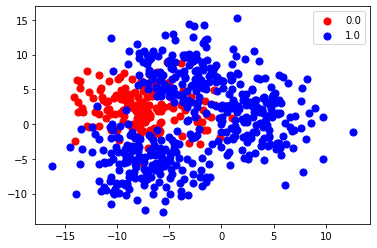

In [ ]:
plot(x_train, y_train)

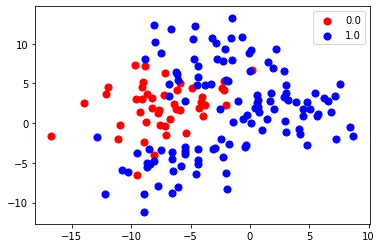

In [ ]:
plot(x_val, y_val)

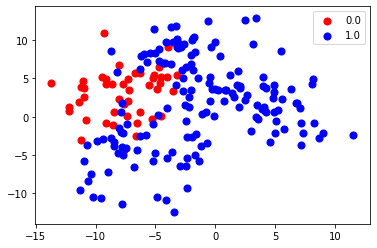

In [ ]:
plot(x_test, y_test)

## Definición del Modelo

En esta sección:
- Definiremos una clase que defina la arquitectura de nuestra red.
- En el constructor crearemos las distintas capas
- En el forward pass las conectaremos

In [ ]:
import torch.nn.functional as F

class Feedforward(torch.nn.Module):
    
    def __init__(self, input_size, hidden_size):
        super(Feedforward, self).__init__()
        
        self.input_size = input_size
        self.hidden_size  = hidden_size
        
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        
        self.fc2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()


    def forward(self, x):
        hidden = self.fc1(x)
        relu = F.relu(hidden)
        output = self.fc2(relu)
        output = torch.sigmoid(output)
        return output

## Crear Modelo

En esta sección:
- Instanciar un modelo
- Instanciar la función de loss binary cross entropy BCELoss()
- Instanciar un optimizador SGD

In [ ]:
model = Feedforward(2, 10)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

## Evaluar Test sin entrenar

- Poner el modelo en modo eval
- Evaluar la loss en los datos de test sin haber entrenado
- Mostrar resultados

In [ ]:
model.eval()
y_pred = model(x_test)
before_train = criterion(y_pred.squeeze(), y_test)
print('Test loss before training' , before_train.item())

Test loss before training 1.0311400890350342


## Entrenamiento

En esta sección:
- Poner el modelo en modo train
- Escribir un loop de entrenamiento por epoch con todo train 
- Guardar la loss en un history

In [ ]:
model.train()
epoch = 1000

history = []

for epoch in range(epoch):
    #Llevar gradientes a zero para calcularlos nuevamente
    optimizer.zero_grad()
    
    # Forward pass
    y_pred = model(x_train)
    
    # Computar Loss
    loss = criterion(y_pred.squeeze(), y_train)
    print(f'Epoch {epoch}: train loss: {loss.item()}\r', end="")
    history.append(loss)
    
    # Backward pass
    loss.backward()
    optimizer.step()

## Plotear historia (loss/epoch) del entrenamiento

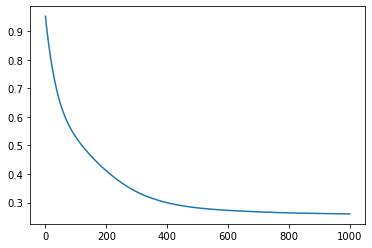

In [ ]:
plt.plot(history)

## Evaluar test después de entrenar

In [ ]:
model.eval()
y_pred = model(x_test)
after_train = criterion(y_pred.squeeze(), y_test)
print('Test loss after Training' , after_train.item())

Test loss after Training 0.2906329929828644


## DataLoaders

Los DataLoaders nos permiten customizar la forma que accedemos a un dataset. Por defecto podemos usarlos para acceder a los datos por medio de batches. También podemos construir nuestros propios DataLoaders para hacer cosas más complejas, como preprocesamiento, carga de imagenes, etc. 

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
x_data = DataLoader(x_test, batch_size=100, shuffle=True)

In [ ]:
for idx, batch in enumerate(x_data):
    print(idx, batch, "\n\n")
    print("\n\n")

0 tensor([[ -4.7207,   8.8082],
        [ -1.8768,   6.1461],
        [ -3.6703,  11.7337],
        [ -1.7672,  10.3675],
        [  3.5665,  -0.3087],
        [ -5.8066,  -2.3533],
        [ -5.1767,  -5.7407],
        [ -8.1881,   5.8101],
        [-11.3973,   1.9590],
        [ -6.3215,  -2.4965],
        [  1.1993,   5.4679],
        [ -4.1197, -10.8559],
        [ -5.2252,  -0.8915],
        [ -1.7110,   8.3924],
        [  8.1407,   4.9682],
        [  2.4810,  12.5858],
        [ -3.4070, -12.3975],
        [ -4.7063,   7.2425],
        [-11.0856,   4.6511],
        [-10.9658,   2.5129],
        [ -2.9807,  -6.3947],
        [ -3.5221,   3.4052],
        [  3.3882,  -0.0163],
        [ -0.1345,   0.0829],
        [ -5.1538,  11.4771],
        [  1.5655,   2.5526],
        [  3.3775,  12.8163],
        [  4.8762,   4.1824],
        [  4.0224,   5.1311],
        [ -3.3084,  11.8022],
        [  4.8891,   3.1574],
        [  4.5559,  -3.3627],
        [ -7.7796, -11.3143],
        

## Usando dataloaders para entrenar con minibatches

En esta sección:
- Crear una lista de listas [[x_train[0], y_train[1]]...[x_train[n], y_train[n]]]
- Crear un dataloader con dicha lista 
- Instanciar un modelo, loss y optimizer
- Escribir un loop de entrenamiento basados en los minibatches del dataloader
- Computar mean batch loss, train loss y val loss al final de cada epoch
- Graficar las losses, observar y concluir.

In [ ]:
train_data = []
for i in range(len(x_train)):
    train_data.append([x_train[i], y_train[i]])

train_dataloader = DataLoader(train_data, batch_size=200, shuffle=True)

In [ ]:
next(iter(train_dataloader))

[tensor([[ -5.7521,   1.9122],
         [ -2.9601,   3.1726],
         [ -3.6296,  -7.8968],
         [  0.5195,  -2.3498],
         [ -7.1344,  -6.5647],
         [  1.2806,   0.6183],
         [ -6.5270, -10.1211],
         [ -7.8330,   3.0576],
         [ -9.1393, -10.2704],
         [ -2.2029,   3.8530],
         [ -3.6559,   4.8744],
         [ -5.7799,  -2.3087],
         [  7.7789,  -6.9037],
         [-13.7806,   3.1923],
         [ -9.2932,  -3.5471],
         [ -2.7456,  -7.1510],
         [  1.4146,   9.8490],
         [  8.1832,   6.5381],
         [ -9.2206,   5.1518],
         [  3.9193,   2.1832],
         [  5.6095,  -3.3781],
         [  0.1066,   6.1868],
         [ -1.7468,   5.9564],
         [ -9.1746,   2.0416],
         [  2.3254,   4.3369],
         [ -4.4167,   8.9143],
         [ -8.4843,   0.0535],
         [ -2.4047,  10.0205],
         [ -2.7609,   9.1347],
         [ -6.4959,  -0.5758],
         [ -8.3720,  -0.4815],
         [ -8.2031,  -0.3338],
        

In [ ]:
model = Feedforward(2, 10)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
epoch = 1000
history_train = []
history_train_mean = []
history_val = []
for epoch in range(epoch):
    #Poner el modelo en modeo entrenamiento
    model.train()
    epoch_loss = 0
    for idx, batch in enumerate(train_dataloader):
        #Llevar gradientes a zero para calcularlos nuevamente
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(batch[0])

        # Computar Loss
        loss = criterion(y_pred.squeeze(), batch[1])
        epoch_loss += loss.item()
        print(f'Epoch {epoch}: batch {idx} train loss: {loss.item()}\r', end="")
  
        # Backward pass
        loss.backward()
        optimizer.step()
        

    #Evaluar loss en todo Train 
    history_train_mean.append(epoch_loss/len(train_dataloader))
    
    #Evaluar loss en todo Train 
    model.eval()
    with torch.no_grad():
        y_pred_train = model(x_train)
        loss_train = criterion(y_pred_train.squeeze(), y_train)
        history_train.append(loss_train)


        #Evaluar loss en un val 
        y_pred_val = model(x_val)
        loss_val = criterion(y_pred_val.squeeze(), y_val)
        history_val.append(loss_val)

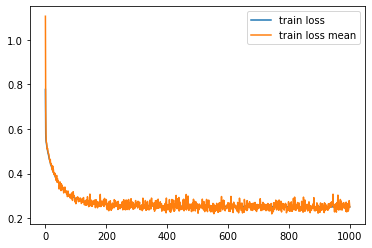

In [ ]:
plt.plot(history_train, label='train loss')
plt.plot(history_train_mean, label='train loss mean')
plt.legend()

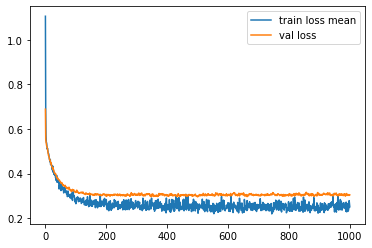

In [ ]:
plt.plot(history_train_mean, label='train loss mean')
plt.plot(history_val, label='val loss')
plt.legend()

## Evaluar loss en todo Test 

In [ ]:
model.eval()
y_pred_test = model(x_test)
loss_test = criterion(y_pred_test.squeeze(), y_test)

In [ ]:
print('Test loss after Training' , loss_test.item())

Test loss after Training 0.2788517475128174


In [1]:
import torch
import torch.nn as nn

In [16]:

upsample = nn.ConvTranspose2d(1, 1, 5, stride=2, padding=1)

In [17]:
input = torch.randn(1, 1, 12, 12)
output = upsample(input)
output.size()

torch.Size([1, 1, 23, 23])